In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin_tnc

In [2]:
df = pd.read_csv("Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
X=df.iloc[:,1:-2]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21
...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04
396,325,107,3,3.0,3.5,9.11
397,330,116,4,5.0,4.5,9.45
398,312,103,3,3.5,4.0,8.78


In [4]:
y = df.iloc[:,-2:-1]
y

,Research
0,1
1,1
2,1
3,1
4,0
...,...
395,1
396,1
397,1
398,0


In [5]:
admitted = df[df['Research']==1].iloc[:,1:]
admitted

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
5,330,115,5,4.5,3.0,9.34,1,0.90
...,...,...,...,...,...,...,...,...
394,329,111,4,4.5,4.0,9.23,1,0.89
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91


In [6]:
not_admitted = df[df['Research']==0].iloc[:,1:]
not_admitted



,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
4,314,103,2,2.0,3.0,8.21,0,0.65
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45
15,314,105,3,3.5,2.5,8.30,0,0.54
...,...,...,...,...,...,...,...,...
388,296,97,2,1.5,2.0,7.80,0,0.49
390,314,102,2,2.0,2.5,8.24,0,0.64
391,318,106,3,2.0,3.0,8.65,0,0.71
393,317,104,2,3.0,3.0,8.76,0,0.77


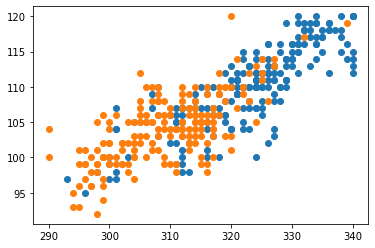

In [7]:
plt.scatter(admitted.iloc[:,:1],admitted.iloc[:,1:2])
plt.scatter(not_admitted.iloc[:,:1],not_admitted.iloc[:,1:2])



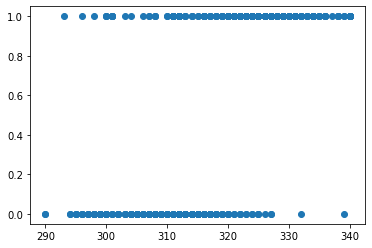

In [8]:
plt.scatter(df.iloc[:,1:2],df.iloc[:,-2:-1])
plt.show()

In [9]:
x=np.c_[np.ones((X.shape[0],1)),X]
x

array([[  1.  , 337.  , 118.  , ...,   4.5 ,   4.5 ,   9.65],
       [  1.  , 324.  , 107.  , ...,   4.  ,   4.5 ,   8.87],
       [  1.  , 316.  , 104.  , ...,   3.  ,   3.5 ,   8.  ],
       ...,
       [  1.  , 330.  , 116.  , ...,   5.  ,   4.5 ,   9.45],
       [  1.  , 312.  , 103.  , ...,   3.5 ,   4.  ,   8.78],
       [  1.  , 333.  , 117.  , ...,   5.  ,   4.  ,   9.66]])

In [10]:
y.to_numpy()
theta = np.zeros((x.shape[1],1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [11]:
def sig(x):
    return 1 / ( 1 + np.exp(-x) );

In [12]:
def theta_x(theta,x):
    return np.dot(x, theta)

In [13]:
def prob(theta, x):
    return sig(theta_x(theta,x)) 

In [14]:
def cost_func(theta,x,y):
    c= - np.sum(( y * np.log(prob(theta,x)) + (1-y)*np.log(1-prob(theta,x))) ) / x.shape[0]
    return c


In [15]:
theta



array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [16]:
def gradient( theta, x, y):
    
    m = x.shape[0]
    return (1 / m) * np.dot(x.T,sig(theta_x(theta,   x)) - y)

In [17]:
def fit( x, y, theta):
    weights = fmin_tnc(func=cost_func, x0=theta,fprime=gradient,args=(x, y.flatten()))
    return weights[0]

In [18]:
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [19]:

parameters = fit(x, y.to_numpy(), theta)
parameters

array([-4.04595405e+01,  1.26503401e-01, -3.88721172e-02,  5.82976193e-02,
        2.78112812e-01,  1.24512913e-01,  3.83790323e-01])

In [20]:
data = prob(parameters.T,x)


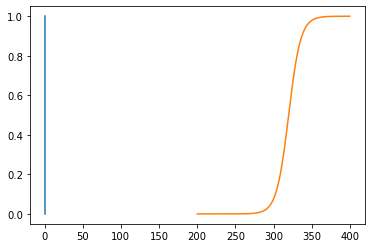

In [21]:
x_n = np.linspace(200,400,300).reshape(-1,1)
# values = probability(parameters[:2].T,X)
# values
x_n=np.c_[np.ones((x_n.shape[0],1)),x_n]
x_n
values = prob(parameters[:2].T,x_n)
plt.plot(x_n,values)

In [22]:
def predict( x):
    theta = parameters[:, np.newaxis]
    return prob(theta, x)

In [23]:
def accuracy( x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100

In [24]:
accuracy(x, y.to_numpy().flatten())

76.25

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [26]:
model = LogisticRegression()
model.fit(x[0:60], y[0:60])
predicted_classes = model.predict(x)
accuracy = accuracy_score(y.to_numpy().flatten(),predicted_classes)
parameters = model.coef_

C:\Users\piyushgupta04\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\piyushgupta04\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
parameters

array([[-0.19967882,  0.0073639 , -0.02533458,  0.60226101, -0.10289307,
         0.55881862, -0.1144892 ]])

In [28]:
accuracy


0.6525